### Shopee Analytics

****

**Yêu cầu**
* Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.
* Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.
* Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.
* Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian.
*
Nâng cao: Trong năm cụ thể
* Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

In [15]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import numpy as np

In [16]:
df = pd.read_csv('../Data/shopeep_koreantop_clothing_shop_data.csv')

In [19]:
df.info()
df.tail(10)
df.response_time.value_counts(sort=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

response_time
 09:02:09    3
 10:10:32    3
 10:04:28    2
 10:03:31    2
 10:19:41    2
            ..
 11:35:22    1
 10:14:13    1
 09:39:18    1
 08:48:19    1
 10:02:42    1
Name: count, Length: 727, dtype: int64

In [4]:
def linear_reg(p1, p2, p3): # Hàm tính các hệ số Linear Regression
    lg = [0,0]
    lg[0], lg[1] = np.polyfit(p3[p1], p3[p2], deg=1)
    return lg

def o_c(str1, str2, str3): # Hàm dọn các giá trị ngoại biên bằng hệ số Z-Scores (outliners cleaner), đối chiếu 2.1.8
    df_1 = str3.dropna(subset=[str1,str2])
    df_2 = df_1[[str1,str2]]
    z = np.abs(stats.zscore(df_2))
    return df_2[(z<0.3).all(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\722117948.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=45)


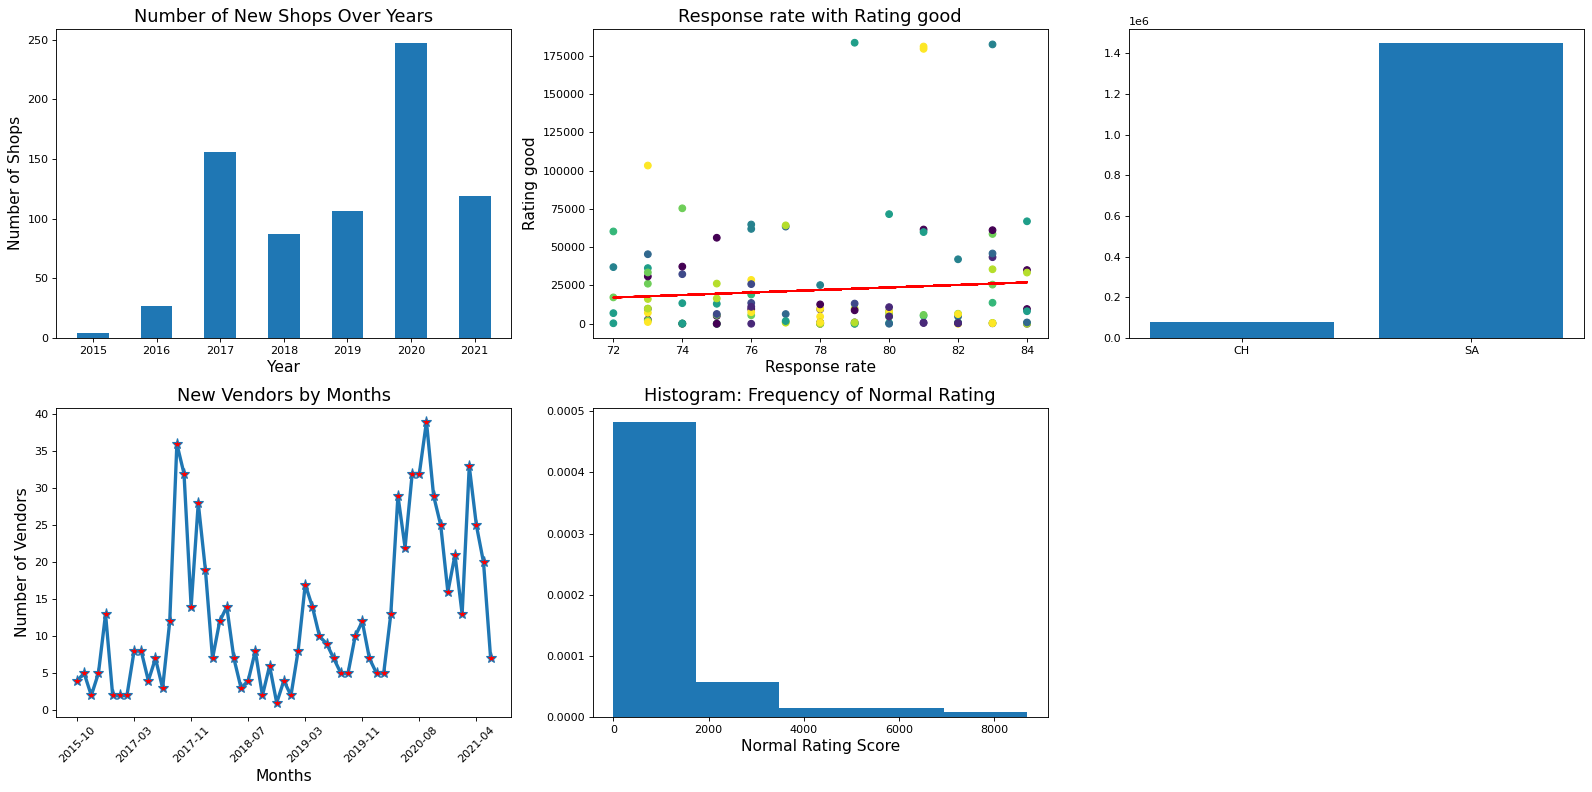

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(20,10), dpi=80) # Cài đặt Figure với các Axes

# Yêu cầu 1
count_shop = df.groupby(['join_year'])[['join_year']].count()
axs[0,0].bar(count_shop.index, count_shop.join_year, width=0.5)
# Tắt tự hiện biểu đồ khi không sử dụng plt.show
axs[0,0].set_title('Number of New Shops Over Years', fontsize=16)
axs[0,0].set_xlabel('Year', fontsize=14)
axs[0,0].set_ylabel('Number of Shops', fontsize=14)

# Yêu cầu 2
%matplotlib inline
df_sub = o_c('response_rate','rating_good', df)
colors = np.random.randint(10, 20, size=df_sub.shape[0])
axs[0,1].scatter(df_sub['response_rate'], df_sub['rating_good'], c=colors)
axs[0,1].set_title('Response rate with Rating good', fontsize=16)
axs[0,1].set_xlabel('Response rate', fontsize=14)
axs[0,1].set_ylabel('Rating good', fontsize=14)
a1 = linear_reg('response_rate', 'rating_good', df_sub)
axs[0,1].plot(df_sub.response_rate, a1[0]*df_sub.response_rate+a1[1], color='r')

# Yêu cầu 3 (Đổi đề bài: tỷ lệ phản hồi tốt)
# Cần đổi định dạng thời gian về giây (seconds)
%matplotlib inline
df_sub = df.loc[:]
df_sub['response_time'] = [e.strip() for e in df.response_time]
# df_sub['response_time'] = pd.to_datetime(df_sub['response_time'], format='%H:%M:%S').dt.time
df_sub['response_time'] = np.where(pd.to_datetime(df_sub['response_time'], format='%H:%M:%S').dt.hour < 12, 'SA', 'CH')
print(df_sub.info())
#df_sub.response_time = [(e = 'SA') if (e < 12) else (e = 'CH') for e in df_sub.response_time]
#print(df_sub.response_time)
# df_sub['response_time'] = [(int(e.strftime('%H'))*int(e.strftime('%M'))*60+int(e.strftime('%S'))) for e in df_sub.response_time]
# df_sub2 = o_c('response_time','rating_bad',df_sub)

# colors = np.random.randint(10, 20, size=df_sub2.shape[0])
# axs[0,2].scatter(df_sub2['response_time'], df_sub2['rating_bad'], c=colors)
# axs[0,2].set_title('Response time with Rating bad', fontsize=16)
# axs[0,2].set_xlabel('Response time (seconds)', fontsize=14)
# axs[0,2].set_ylabel('Rating bad', fontsize=14)
# a1 = linear_reg('response_time', 'rating_bad', df_sub2)
# axs[0,2].plot(df_sub2.response_time, a1[0]*df_sub2.response_time+a1[1], color='r')
day = df_sub.groupby(['response_time'])[['rating_bad']].sum()
print(day)
axs[0,2].bar(day.index, day.rating_bad)


# Yêu cầu 4
from datetime import datetime
%matplotlib inline
year = df_sub['join_year']
month = df_sub['join_month']
day = df_sub['join_day']
combin = ['{} {} {}'.format(year[i], month[i], day[i]) for i in range(len(df_sub.index))]
df['join_time'] = combin

df_sub = df.loc[:]
df_sub['join_time'] = [datetime.strptime(e, '%Y %B %d') for e in df_sub['join_time']] 
# Tham khảo: https://www.programiz.com/python-programming/datetime/strptime#google_vignette
# https://www.geeksforgeeks.org/python-datetime-strptime-function/
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

df_sub['join_time'] = pd.to_datetime(df_sub.join_time) # Phải ép về kiểu của Pandas để extract ra year, month, day. p/s: khó hiểu thật sự

count_join = df_sub.groupby(df_sub.join_time.dt.to_period('M'))[['join_time']].count()
axs[1,0].plot(np.asarray([str(e) for e in count_join.index]),count_join.join_time, linewidth=3, marker='*', markersize=10, markerfacecolor='red')
axs[1,0].set_title('New Vendors by Months', fontsize=16)
axs[1,0].set_xlabel('Months', fontsize=14)
axs[1,0].set_ylabel('Number of Vendors', fontsize=14)
axs[1,0].xaxis.set_major_locator(tk.MaxNLocator(8)) # Tham khao: https://saturncloud.io/blog/optimizing-tick-label-text-and-frequency-in-matplotlib-plots/
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=45)
# Tham khảo: https://saturncloud.io/blog/rotate-tick-labels-in-subplot-using-pyplot-matplotlib-and-gridspec/#:~:text=Rotating%20Tick%20Labels%20with%20Matplotlib,set_xticklabels()%20functions%20in%20Matplotlib.&text=Now%2C%20the%20x%2Daxis%20tick,there%20is%20no%20more%20overlapping.

# Yêu cầu 5
%matplotlib inline
df_sub = df[['rating_normal']].dropna()
z = np.abs(stats.zscore(df_sub.rating_normal))
df_sub_2 = df_sub[z<0.3]
axs[1,1].hist(df_sub_2.rating_normal, bins=5, density=True)
axs[1,1].set_title('Histogram: Frequency of Normal Rating', fontsize=16)
axs[1,1].set_xlabel('Normal Rating Score', fontsize=14)
plt.delaxes(axs[1,2])
plt.tight_layout()
plt.show()

Tham khảo yêu cầu 3\
[Convert Full name Month to Month and Full Time](https://www.geeksforgeeks.org/python-datetime-strptime-function/)\
[String to DateTime object](https://www.programiz.com/python-programming/datetime/strptime#google_vignette)